# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [ ]:
# 0. Install external modules
!pip install fitter

In [6]:
# 1. Load modules
import pandas as pd
import numpy as np
import chardet as ch 
import missingno as msno
import random as rnd
import math

import matplotlib.pyplot as plt
import matplotlib.style as style
import scipy.special as sp
import seaborn as sns

from fitter import Fitter, get_common_distributions

from scipy import stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, PowerTransformer, OrdinalEncoder, FunctionTransformer
from sklearn.metrics import r2_score,mean_squared_error, f1_score, roc_auc_score, classification_report

from sklearn.linear_model import BayesianRidge, Ridge, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostClassifier, RandomForestClassifier

In [3]:
plt.style.use('ggplot')
sns.set_context("notebook")
rnd.seed(42)
np.random.RandomState(42)

RandomState(MT19937) at 0x1838E3CDE40

# Data Validation

## Load Data

In [4]:
# check CSV file encoding to reduce reding errors and data cleanup
with open('recipe_site_traffic_2212.csv', 'rb') as file:             
    print(ch.detect(file.read()))

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [5]:
# load into pandas df
df = pd.read_csv('recipe_site_traffic_2212.csv', encoding = "ascii")     # load data into dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [7]:
df.describe()

,recipe,calories,carbohydrate,sugar,protein
count,947.000000,895.000000,895.000000,895.000000,895.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296
std,273.519652,453.020997,43.949032,14.679176,36.369739
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,597.650000,44.965000,9.800000,30.200000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


In [8]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [9]:
df.tail(5)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
942,943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,NaN
943,944,NaN,NaN,NaN,NaN,Potato,2,High
944,945,951.74,29.42,3.57,13.87,Pork,2,High
945,946,266.61,35.77,0.97,8.07,Potato,6,High
946,947,184.56,45.21,6.20,0.03,Beverages,4,NaN


## Data Clean Up

In [10]:
# convert "object" data type columns to datatypes specified in the data information page
df.sample(n = 10)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
595,596,306.90,19.65,10.34,28.37,Pork,2,High
655,656,291.89,36.28,63.14,7.02,Dessert,4,High
711,712,NaN,NaN,NaN,NaN,Lunch/Snacks,4,High
344,345,134.48,45.50,37.08,0.20,Chicken,4,NaN
738,739,179.24,265.09,0.15,45.29,One Dish Meal,6,High
364,365,268.04,77.70,2.43,0.88,Beverages,2,NaN
128,129,72.71,38.40,4.37,7.44,Breakfast,4,NaN
493,494,581.97,8.29,29.15,0.43,Beverages,4,NaN
558,559,567.10,15.55,9.34,14.10,Chicken,4,NaN
63,64,813.08,88.55,0.47,136.89,Chicken,1,High


In [15]:
df.sort_values(by=['protein'], ascending=False).head(20)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
681,682,339.38,5.75,10.19,363.36,Chicken Breast,6,High
695,696,891.11,15.20,1.50,286.97,Chicken,2,NaN
861,862,1646.67,9.42,5.12,245.57,Chicken Breast,6,High
342,343,111.10,37.55,6.60,239.57,Lunch/Snacks,2,NaN
383,384,708.64,45.44,4.55,221.91,Chicken Breast,6,High
29,30,164.76,33.58,17.87,220.14,One Dish Meal,2,High
328,329,561.43,11.83,9.00,189.33,Pork,6,High
206,207,551.70,1.11,5.90,186.18,Pork,4,High
782,783,44.15,18.62,1.65,182.63,Pork,1,High
616,617,382.43,62.95,19.81,180.06,Pork,4,High


### Convert 'servings' Column to INT

In [10]:
df['servings'].unique()

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

In [11]:
df[df.servings.isin( ['4 as a snack', '6 as a snack'])]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
451,452,1542.53,14.73,5.71,29.92,Lunch/Snacks,4 as a snack,High
548,549,1440.69,30.59,5.78,30.63,Lunch/Snacks,6 as a snack,High
735,736,513.75,65.87,18.63,18.39,Lunch/Snacks,4 as a snack,NaN


In [12]:
df.servings = df.servings.str.replace('4 as a snack', '4') 
df.servings = df.servings.str.replace('6 as a snack', '6')

In [13]:
df.servings.unique()

array(['6', '4', '1', '2'], dtype=object)

In [14]:
convert_dtypes = {'servings':'int32'}
df = df.astype(convert_dtypes)
df.describe()

,recipe,calories,carbohydrate,sugar,protein,servings
count,947.000000,895.000000,895.000000,895.000000,895.000000,947.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296,3.477297
std,273.519652,453.020997,43.949032,14.679176,36.369739,1.732741
min,1.000000,0.140000,0.030000,0.010000,0.000000,1.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000,2.000000
50%,474.000000,288.550000,21.480000,4.550000,10.800000,4.000000
75%,710.500000,597.650000,44.965000,9.800000,30.200000,4.000000
max,947.000000,3633.160000,530.420000,148.750000,363.360000,6.000000


### Clean up 'category' and convert to categorical variable

In [15]:
df.category.unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)

In [16]:
df.category = df.category.str.replace('Chicken Breast', 'Chicken')

In [17]:
df.category = df.category.astype('category')

### Convert 'high_traffic' Column to BOOL

In [18]:
df.high_traffic = df.high_traffic.apply(lambda x: True if x == 'High' else False)

In [19]:
df.high_traffic.sum()

574

## Missing Values Treatment

### Inspect Missing Values

<AxesSubplot: >

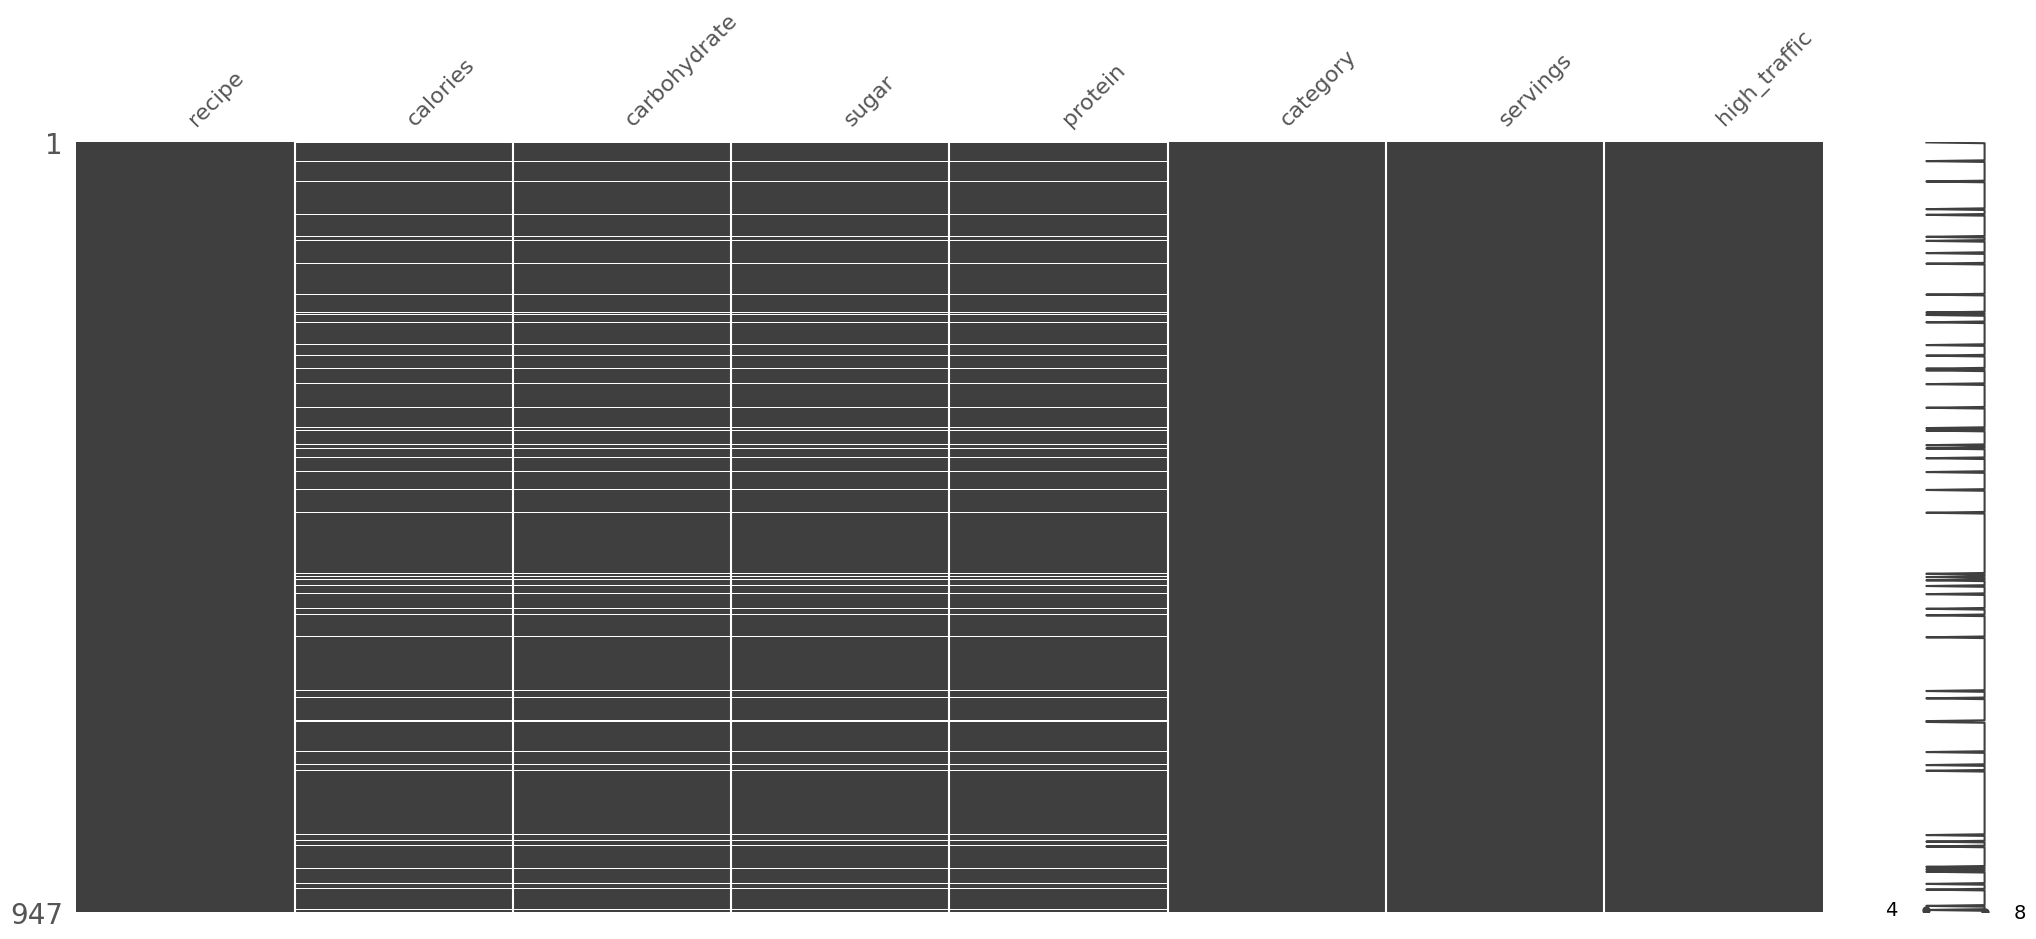

In [20]:
msno.matrix(df)

In [21]:
df[df.calories.isna() | df.carbohydrate.isna() | df.sugar.isna() | df.protein.isna()].sample(n=20)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
538,539,NaN,NaN,NaN,NaN,Vegetable,4,True
683,684,NaN,NaN,NaN,NaN,Potato,1,True
23,24,NaN,NaN,NaN,NaN,Meat,2,False
545,546,NaN,NaN,NaN,NaN,Chicken,6,True
896,897,NaN,NaN,NaN,NaN,Chicken,6,True
427,428,NaN,NaN,NaN,NaN,Vegetable,4,True
351,352,NaN,NaN,NaN,NaN,Potato,4,True
278,279,NaN,NaN,NaN,NaN,Lunch/Snacks,4,True
911,912,NaN,NaN,NaN,NaN,Dessert,6,True
581,582,NaN,NaN,NaN,NaN,Chicken,1,False


### Drop Rows with null values in **all** numeric columns

In [22]:
df = df.dropna(subset=['calories', 'carbohydrate', 'sugar', 'protein'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        895 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      895 non-null    category
 6   servings      895 non-null    int32   
 7   high_traffic  895 non-null    bool    
dtypes: bool(1), category(1), float64(4), int32(1), int64(1)
memory usage: 47.6 KB


### Replace NaN in numeric columns with 0

In [23]:
#df[['calories', 'carbohydrate', 'sugar', 'protein']].fillna(0)

### Convert numeric columns to log scale or other trasnformation to make them more normal

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 10.55it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,7.131297e-07,2033.074917,-18730.241042,inf,0.014449,9.908628e-01
expon,8.961231e-07,2053.081728,-18532.606918,inf,0.034738,2.250201e-01
exponpow,4.537323e-06,2038.441266,-17074.106893,inf,0.185376,2.144140e-27
powerlaw,7.652535e-06,1724.090613,-16606.290637,inf,0.272117,4.842815e-59
cauchy,8.481820e-06,2026.193285,-16521.002571,inf,0.207217,3.488622e-34


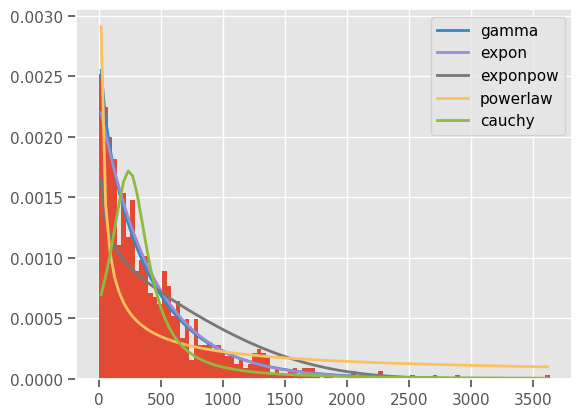

In [24]:
calories_dist = Fitter(df.calories, distributions= get_common_distributions())
calories_dist.fit()
calories_dist.summary()

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 10.74it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.000026,2087.307023,-15510.066974,inf,0.034053,2.448514e-01
expon,0.000064,2228.980292,-14713.756415,inf,0.051863,1.564103e-02
lognorm,0.000065,1753.346910,-14697.513924,inf,0.039122,1.257948e-01
exponpow,0.000245,1654.184667,-13502.655900,inf,0.123195,2.689699e-12
cauchy,0.000700,1792.701547,-12571.122835,inf,0.209745,5.084360e-35


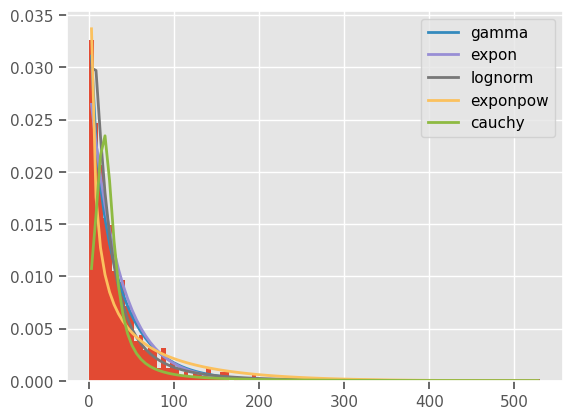

In [25]:
carbohydrate_dist = Fitter(df.carbohydrate, distributions= get_common_distributions())
carbohydrate_dist.fit()
carbohydrate_dist.summary()

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 15.81it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.001403,1497.859824,-11942.240208,inf,0.037509,1.570947e-01
chi2,0.002124,1870.428554,-11571.101962,inf,0.071651,1.930654e-04
expon,0.004014,2090.238045,-11008.096015,inf,0.120984,7.121677e-12
cauchy,0.010823,1597.851324,-10120.439602,inf,0.220555,1.024220e-38
exponpow,0.012918,1182.807183,-9955.235805,inf,0.312943,2.217346e-78


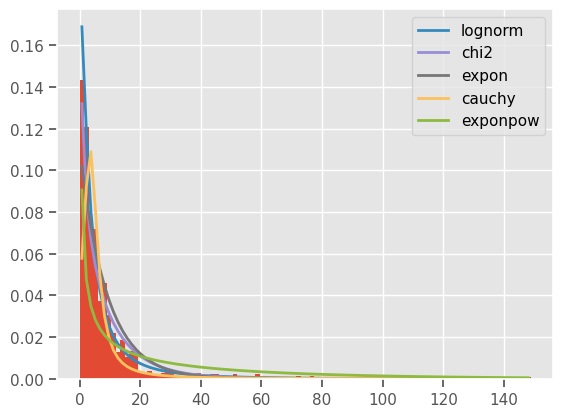

In [26]:
sugar_dist = Fitter(df.sugar, distributions= get_common_distributions())
sugar_dist.fit()
sugar_dist.summary()

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 13.22it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.000112,1580.646657,-14203.906423,inf,0.053457,1.156682e-02
chi2,0.000386,1784.497937,-13097.904960,inf,0.025466,5.980449e-01
gamma,0.000405,1911.062838,-13054.940531,inf,0.032678,2.884777e-01
exponpow,0.001565,1439.312353,-11844.446716,inf,0.195067,2.604388e-30
expon,0.001609,2145.491176,-11826.287844,inf,0.149022,8.161904e-18


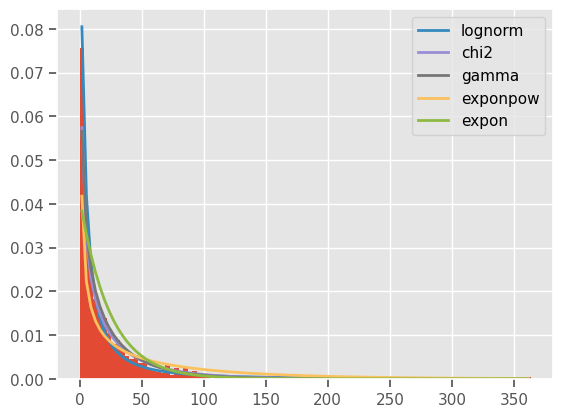

In [27]:
protein_dist = Fitter(df.protein, distributions= get_common_distributions())
protein_dist.fit()
protein_dist.summary()

## Create a '_per_serving' column copies for 'calories', 'carbohydrate', 'sugar', 'protein' columns

In [29]:
for i in cols_orig: 
    df[i + '_p_srv'] = df.apply(lambda x: x[i] / x['servings'], axis=1)

In [78]:
# apply log transformations to num columns
cols_orig = ['calories', 'carbohydrate', 'sugar', 'protein']
cols_log = ['calories_log', 'carbohydrate_log', 'sugar_log', 'protein_log']
cols_p_srv = [col + '_p_srv' for col in cols_orig]

transformer = FunctionTransformer(np.log1p)
df[cols_p_srv] = transformer.fit_transform(df[cols_p_srv])

### Review and validate data

In [79]:
df.sample(n=10)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic,calories_log,carbohydrate_log,sugar_log,protein_log,calories_p_srv,carbohydrate_p_srv,sugar_p_srv,protein_p_srv
767,768,337.25,31.92,8.00,27.51,One Dish Meal,1,True,5.823785,3.494080,2.197225,3.350255,5.823785,3.494080,2.197225,3.350255
248,249,208.87,32.34,7.41,6.42,Chicken,6,False,5.346488,3.506758,2.129421,2.004179,3.578274,1.854734,0.804241,0.727549
797,798,94.44,13.41,2.48,3.24,Potato,4,True,4.558498,2.667922,1.247032,1.444563,3.203153,1.470750,0.482426,0.593327
92,93,34.77,10.48,12.33,8.63,Breakfast,6,False,3.577110,2.440606,2.590017,2.264883,1.916187,1.010388,1.116780,0.891315
420,421,94.04,5.17,0.68,0.01,Beverages,2,False,4.554298,1.819699,0.518794,0.009950,3.871618,1.276758,0.292670,0.004988
189,190,529.68,23.75,2.28,15.81,Breakfast,1,True,6.274159,3.208825,1.187843,2.821974,6.274159,3.208825,1.187843,2.821974
679,680,178.95,22.59,4.04,7.04,One Dish Meal,2,True,5.192679,3.160823,1.617406,2.084429,4.505074,2.509193,1.105257,1.508512
63,64,813.08,88.55,0.47,136.89,Chicken,1,True,6.702059,4.494797,0.385262,4.926456,6.702059,4.494797,0.385262,4.926456
218,219,166.44,0.53,29.68,4.86,Dessert,6,True,5.120625,0.425268,3.423611,1.768150,3.358290,0.084647,1.782831,0.593327
479,480,525.28,62.46,1.27,10.85,Lunch/Snacks,1,True,6.265833,4.150410,0.819780,2.472328,6.265833,4.150410,0.819780,2.472328


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   recipe              895 non-null    int64   
 1   calories            895 non-null    float64 
 2   carbohydrate        895 non-null    float64 
 3   sugar               895 non-null    float64 
 4   protein             895 non-null    float64 
 5   category            895 non-null    category
 6   servings            895 non-null    int32   
 7   high_traffic        895 non-null    bool    
 8   calories_log        895 non-null    float64 
 9   carbohydrate_log    895 non-null    float64 
 10  sugar_log           895 non-null    float64 
 11  protein_log         895 non-null    float64 
 12  calories_p_srv      895 non-null    float64 
 13  carbohydrate_p_srv  895 non-null    float64 
 14  sugar_p_srv         895 non-null    float64 
 15  protein_p_srv       895 non-null    floa

In [81]:
df.recipe.duplicated().sum()

0

# Exploratory Analysis

In [82]:
target = ['high_traffic']
cols_orig = ['calories', 'carbohydrate', 'sugar', 'protein']
cols_perServ = ['calories_p_srv', 'carbohydrate_p_srv', 'sugar_p_srv', 'protein_p_srv']
cols_log = ['calories_log', 'carbohydrate_log', 'sugar_log', 'protein_log']
catcols = ['category', 'servings']

<AxesSubplot: >

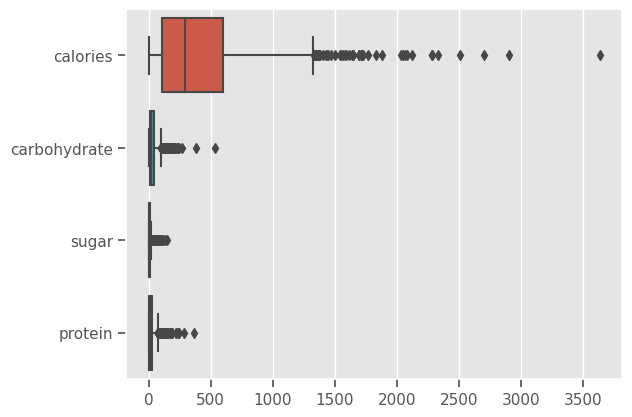

In [83]:
sns.boxplot(data=df[cols_orig], orient="h")

<AxesSubplot: >

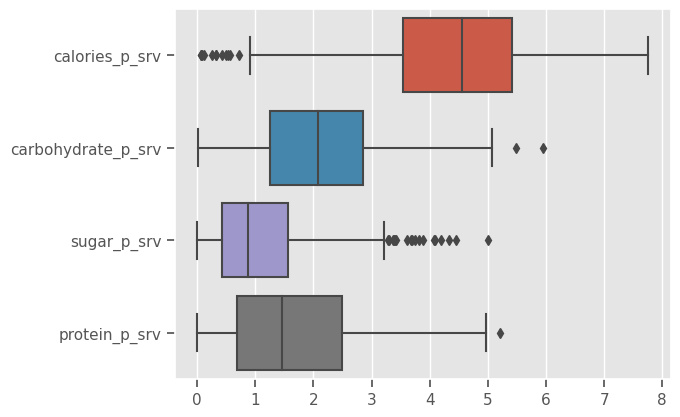

In [84]:
sns.boxplot(data=df[cols_perServ], orient="h")

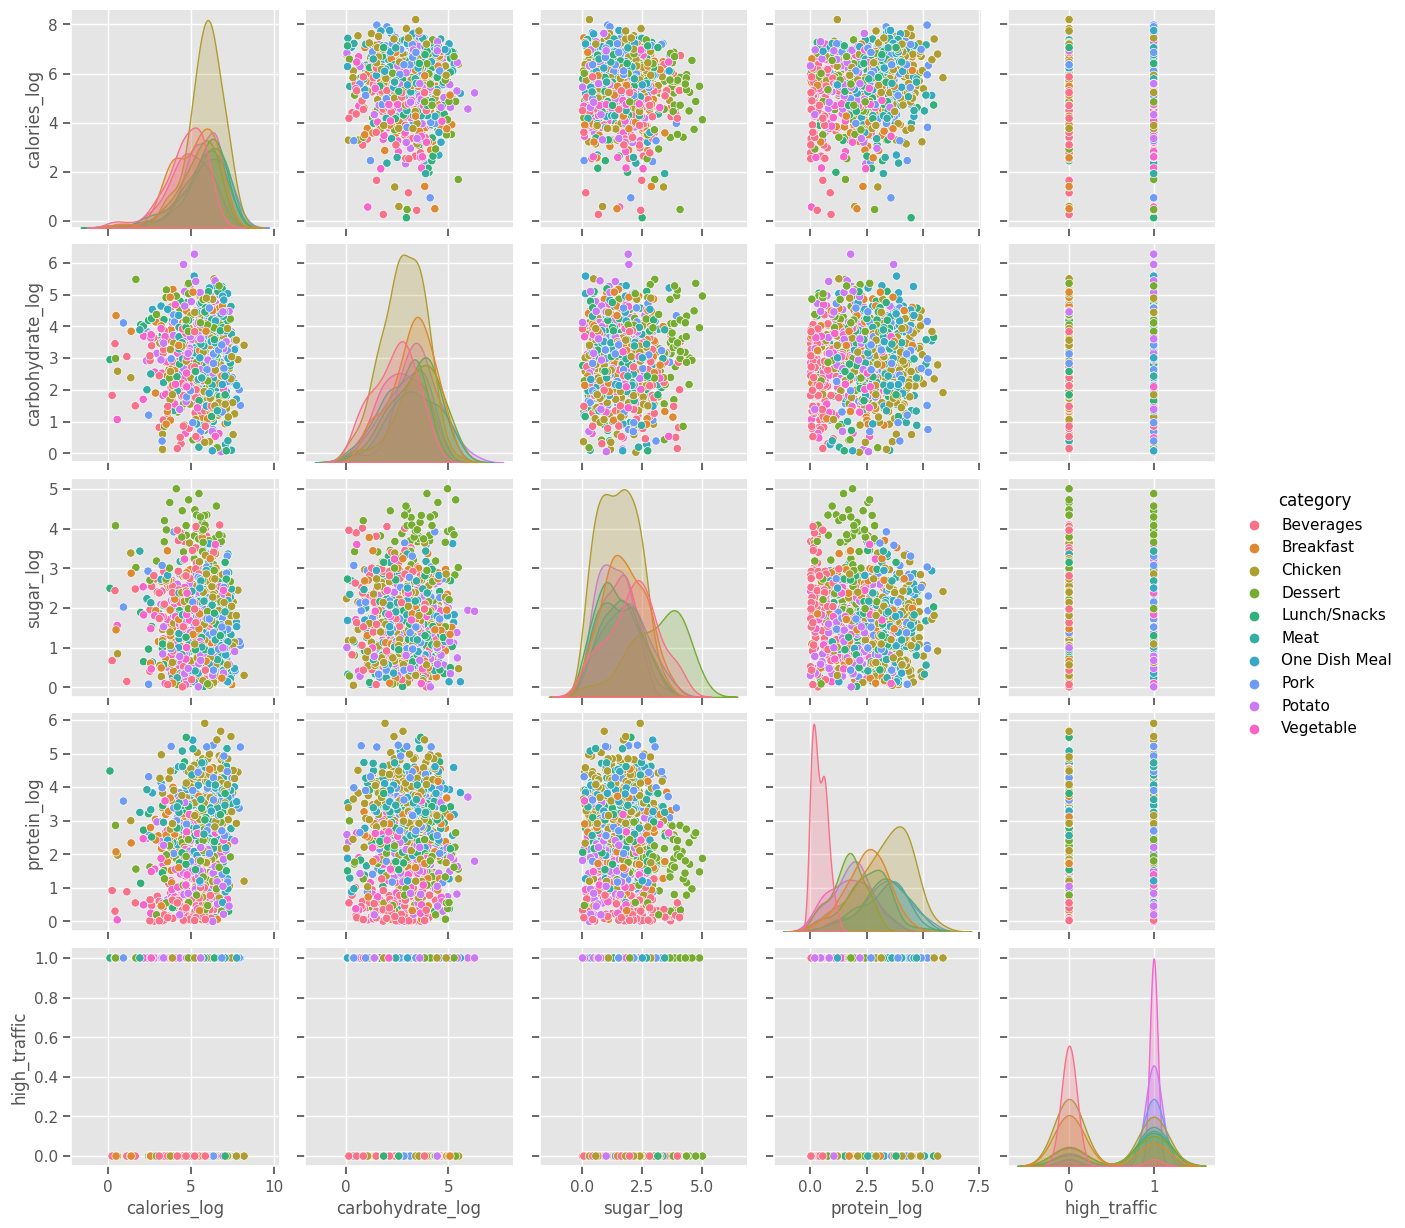

In [85]:
sns.pairplot(df[cols_log + ['category'] + target], hue='category')

<AxesSubplot: xlabel='category', ylabel='calories_log'>

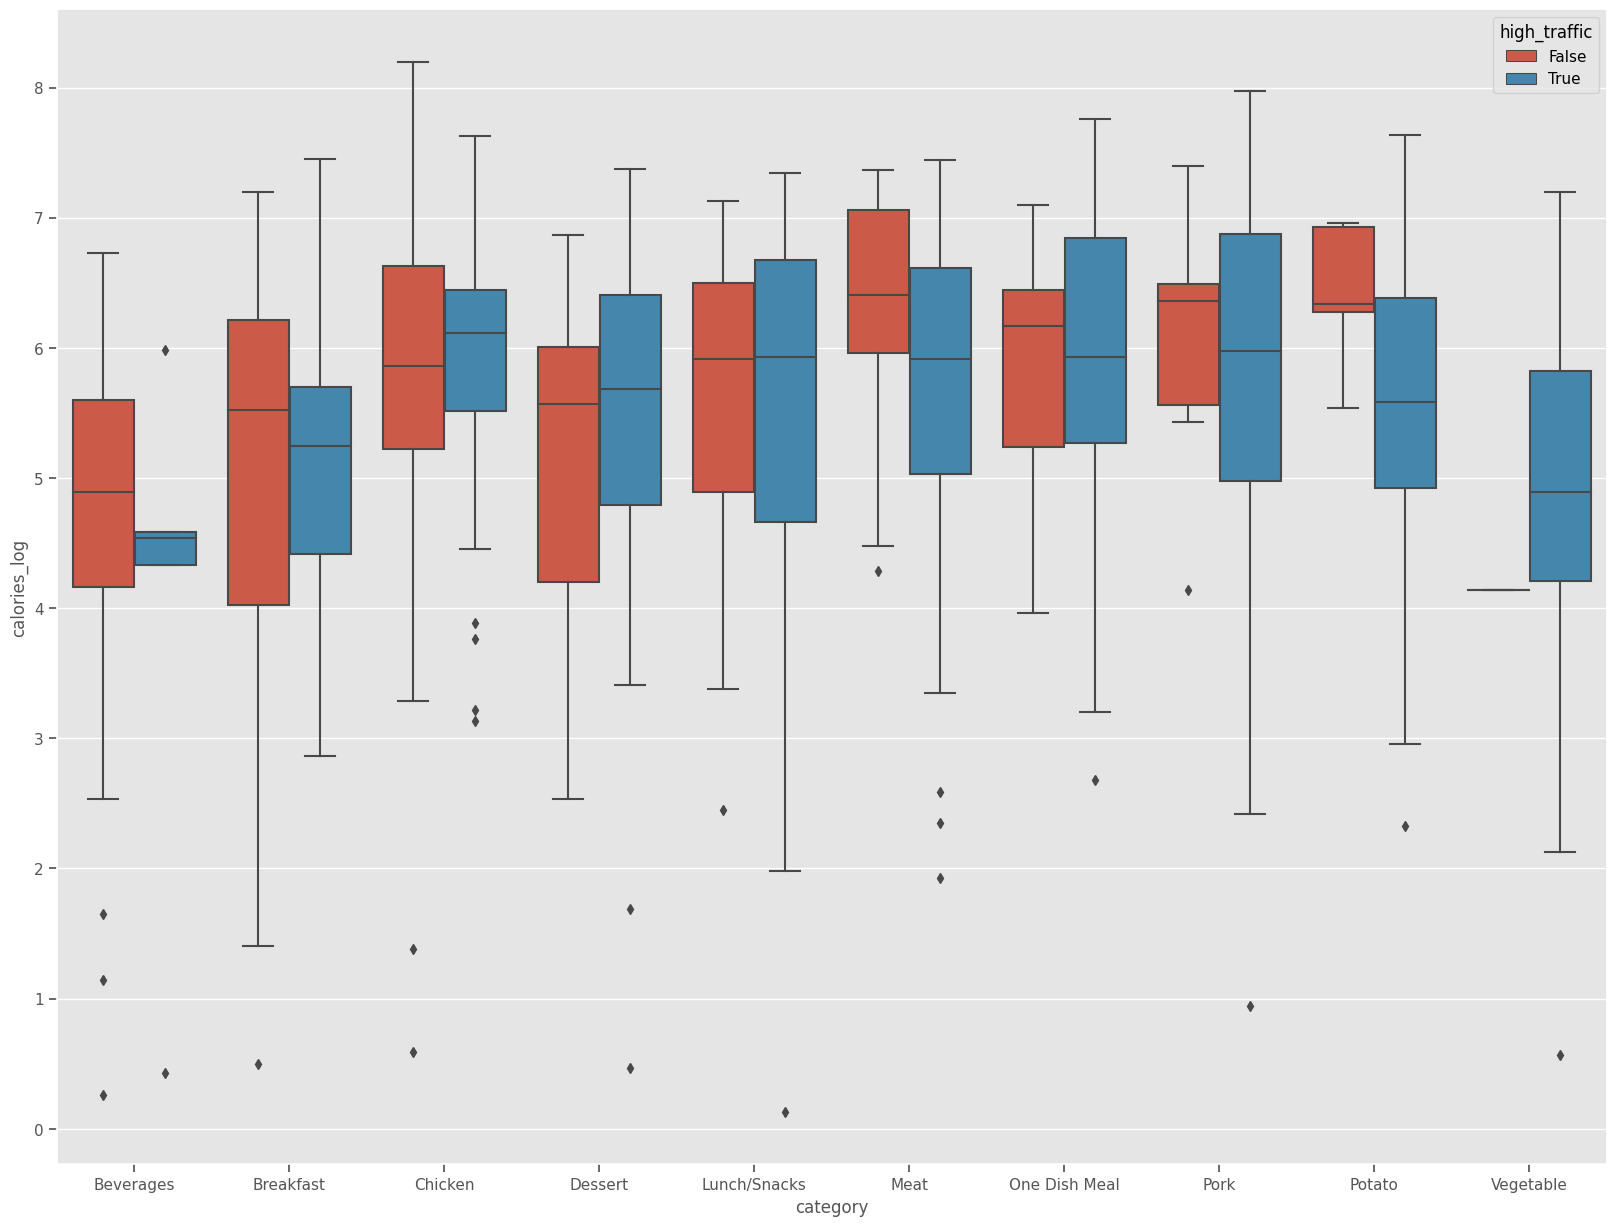

In [86]:
fig = plt.figure(figsize=(20,15))
sns.boxplot(data=df, y="calories_log", x="category", hue="high_traffic")

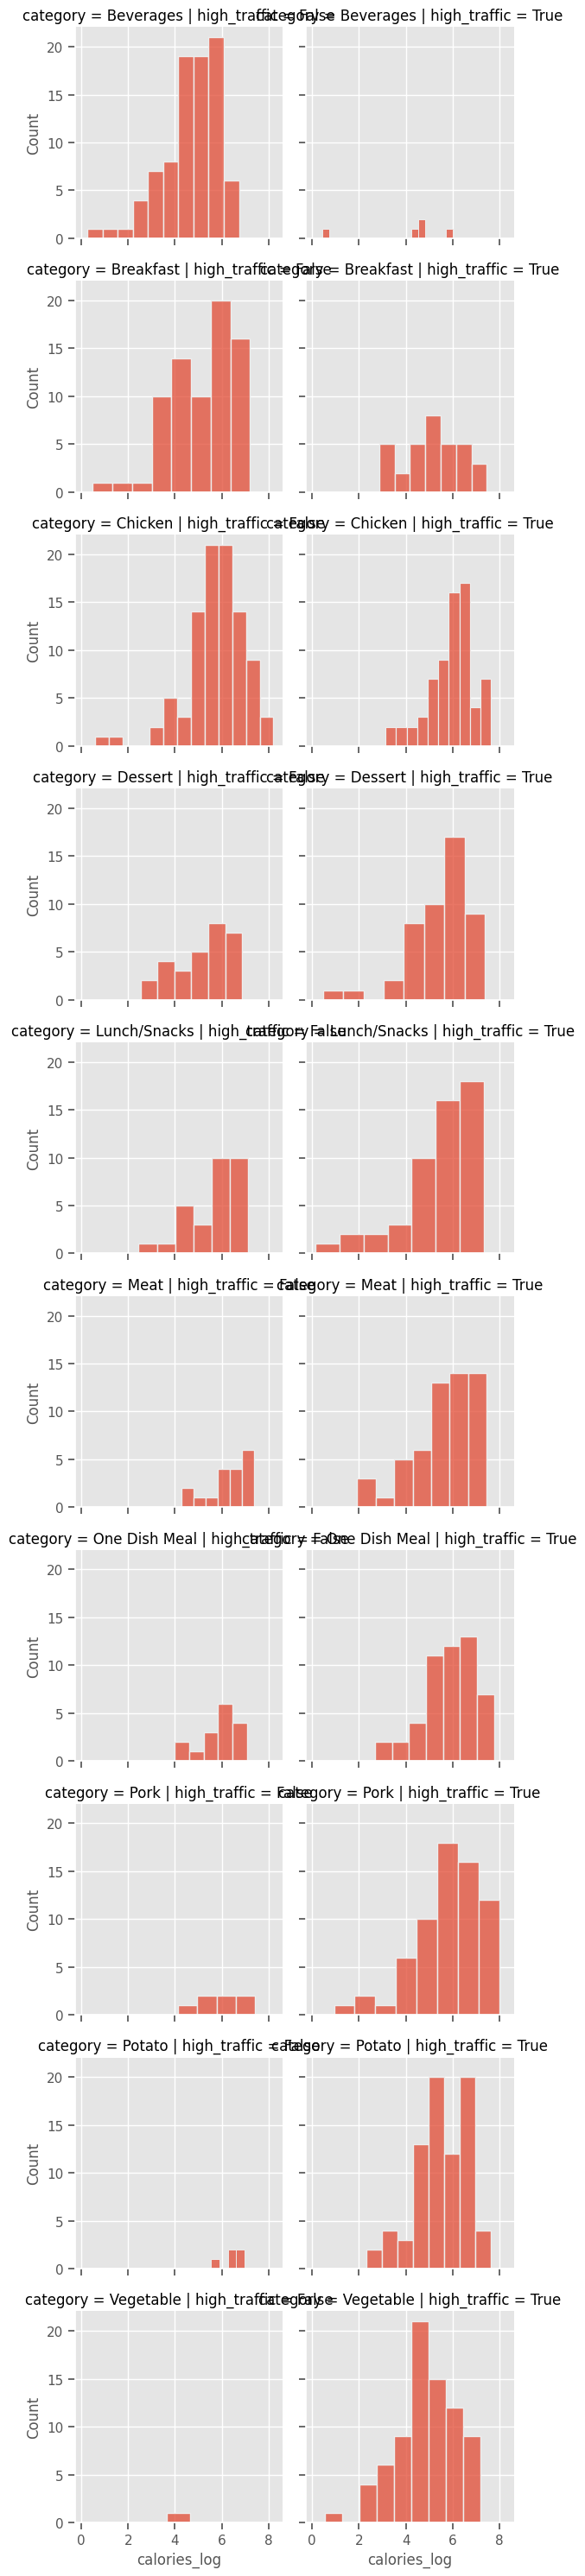

In [87]:
g = sns.FacetGrid(df, col="high_traffic", row="category")
g.map_dataframe(sns.histplot, x="calories_log")

AttributeError: 'numpy.ndarray' object has no attribute 'xaxis'

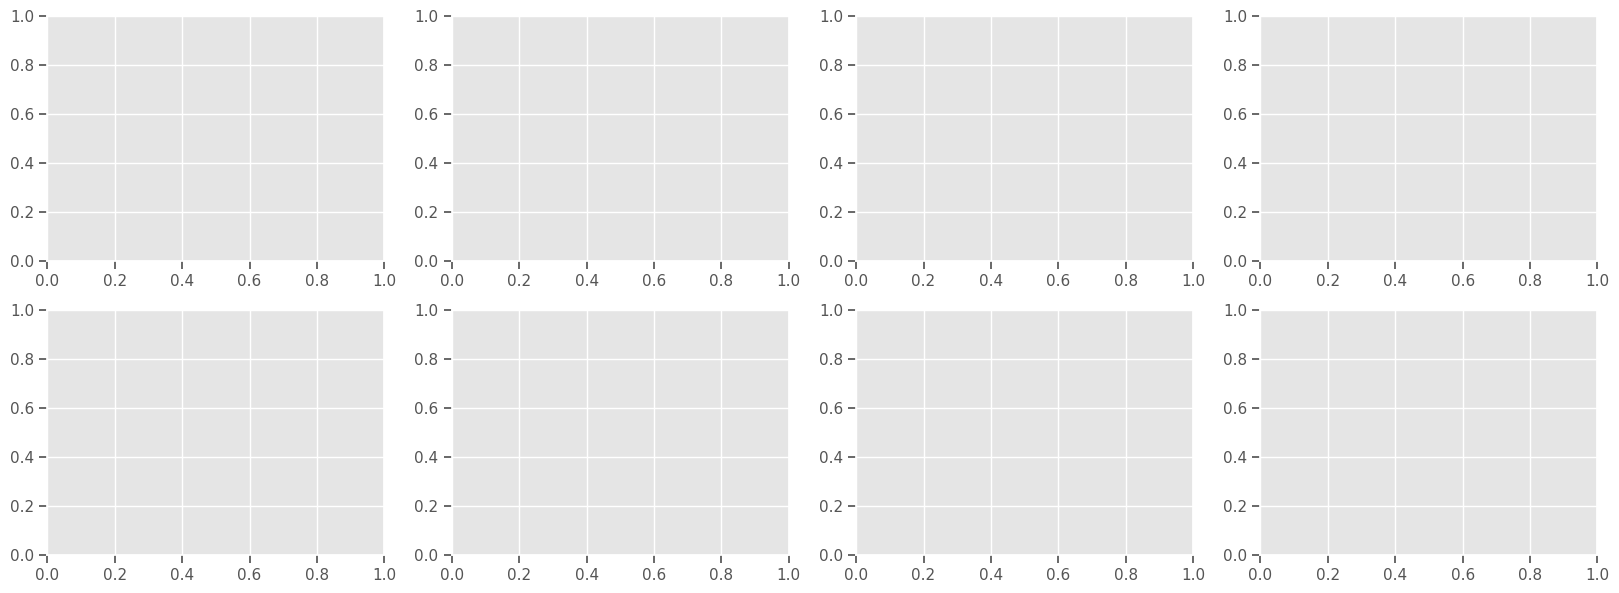

In [88]:
# Target Variable
fig, axes = plt.subplots(2,4,figsize=(20,7))
sns.histplot(df['calories'], ax = axes[0])
sns.histplot(df['carbohydrate'], ax = axes[1])
sns.histplot(df['sugar'], ax = axes[2])
sns.histplot(df['protein'], ax = axes[3])

### Convert numeric columns to log scale

# Model Fitting and Evaluation

In [89]:
df_model = df.copy()
cat_encode = OrdinalEncoder()
cat_cols = ['servings', 'category']

df_model[cat_cols] = cat_encode.fit_transform(df_model[cat_cols]) 

In [90]:
target = ['high_traffic']
# feature_cols = ['calories_log', 'carbohydrate_log', 'sugar_log', 'protein_log', 'servings', 'category']
feature_cols = cols_p_srv + ['servings', 'category']
X = df_model[feature_cols]           # Features
y = df_model[target]                 # Target variable

In [92]:
# define the scaler 
scaler = PowerTransformer()
# fit and transform the train set
X[cols_p_srv] = scaler.fit_transform(X[cols_p_srv])

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Decision Tree Classifier

In [94]:
tc = DecisionTreeClassifier()
tc.fit(X_train, y_train)

DecisionTreeClassifier()

In [95]:
y_pred = tc.predict(X_test)
print('Classification Report: ')
print(classification_report(y_test,y_pred))

Classification Report: 
              precision    recall  f1-score   support

       False       0.60      0.63      0.61       111
        True       0.73      0.70      0.72       158

    accuracy                           0.67       269
   macro avg       0.66      0.67      0.67       269
weighted avg       0.68      0.67      0.67       269



In [96]:
tc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [97]:
# With Random Hyperparameter tuning
tc = DecisionTreeClassifier()
param_space = {'criterion': ['gini', 'entropy', 'log_loss'], 'ccp_alpha':[0, 0.01, 0.1, 1], 'max_features':['auto', 'sqrt', 'log2']}
stc = RandomizedSearchCV(tc, param_space, random_state=0)
search = stc.fit(X_train, y_train)
search.best_params_

{'max_features': 'log2', 'criterion': 'gini', 'ccp_alpha': 0.01}

In [98]:
y_pred = stc.predict(X_test)
print('Classification Report: ')
print(classification_report(y_test,y_pred))

Classification Report: 
              precision    recall  f1-score   support

       False       0.61      0.74      0.67       111
        True       0.78      0.66      0.72       158

    accuracy                           0.70       269
   macro avg       0.70      0.70      0.69       269
weighted avg       0.71      0.70      0.70       269



## Adaboost Classifier

In [99]:
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_features='sqrt', criterion='gini', ccp_alpha=0.01))
abc.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.01,
                                                         max_features='sqrt'))

In [100]:
y_pred = abc.predict(X_test)
print('Classification Report: ')
print(classification_report(y_test,y_pred))

Classification Report: 
              precision    recall  f1-score   support

       False       0.70      0.63      0.66       111
        True       0.76      0.81      0.78       158

    accuracy                           0.74       269
   macro avg       0.73      0.72      0.72       269
weighted avg       0.73      0.74      0.73       269



In [101]:
abc.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__ccp_alpha': 0.01,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': 'sqrt',
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(ccp_alpha=0.01, max_features='sqrt'),
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [102]:
# With Random Hyperparameter tuning
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_features='sqrt', criterion='gini', ccp_alpha=0.01))
param_space = {'learning_rate': np.linspace(0.0, 1.0, num=20) , 'n_estimators':[10, 50, 100, 500]}
sabc = RandomizedSearchCV(abc, param_space, random_state=0)
search = sabc.fit(X_train, y_train)
search.best_params_

{'n_estimators': 100, 'learning_rate': 0.3684210526315789}

In [103]:
y_pred = sabc.predict(X_test)
print('Classification Report: ')
print(classification_report(y_test,y_pred))

Classification Report: 
              precision    recall  f1-score   support

       False       0.76      0.56      0.64       111
        True       0.74      0.87      0.80       158

    accuracy                           0.74       269
   macro avg       0.75      0.72      0.72       269
weighted avg       0.75      0.74      0.74       269



## Random Forest Classifier

In [61]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [62]:
y_pred = rfc.predict(X_test)
print('Classification Report: ')
print(classification_report(y_test,y_pred))

Classification Report: 
              precision    recall  f1-score   support

       False       0.70      0.58      0.63       111
        True       0.73      0.82      0.78       158

    accuracy                           0.72       269
   macro avg       0.72      0.70      0.70       269
weighted avg       0.72      0.72      0.72       269



## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation